In [1]:
%matplotlib inline
import os, sys
from pycocotools.coco import COCO
# from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
sys.path.append('coco-caption')
from pycocoevalcap.eval import COCOEvalCap

In [5]:
# set up file names and pathes
dataDir='/media/MyDataStor2/zhanghex/coco2017'
dataType='val2017'
algName = 'fakecap'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
subtypes=['results', 'evalImgs', 'eval']
# [resFile, evalImgsFile, evalFile]= \
# ['%s/results/captions_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]
resFile = 'catr/results/captions_val2017_results.json'
# # download Stanford models
# ! bash get_stanford_models.sh

# # download Google word2vec model
# ! bash get_google_word2vec_model.sh

In [6]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!


In [6]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 10300, 'reflen': 10181, 'guess': [10300, 9261, 8222, 7183], 'correct': [7549, 4067, 2008, 968]}
ratio: 1.0116884392494832
Bleu_1: 0.733
Bleu_2: 0.567
Bleu_3: 0.428
Bleu_4: 0.321
computing METEOR score...
METEOR: 0.266
computing Rouge score...
ROUGE_L: 0.548
computing CIDEr score...
CIDEr: 1.078
computing SPICE score...
SPICE: 0.199
computing WMD score...
WMD: 0.225


In [7]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.733
Bleu_2: 0.567
Bleu_3: 0.428
Bleu_4: 0.321
METEOR: 0.266
ROUGE_L: 0.548
CIDEr: 1.078
SPICE: 0.199
WMD: 0.225


ground truth captions
a blue bike parked on a side walk 
A bicycle is chained to a fixture on a city street
A blue bicycle sits on a sidewalk near a street.
A bicycle is locked up to a post
a bike sits parked next to a street 


generated caption (CIDEr score 1.4)
A blue bicycle parked on the side of a street.


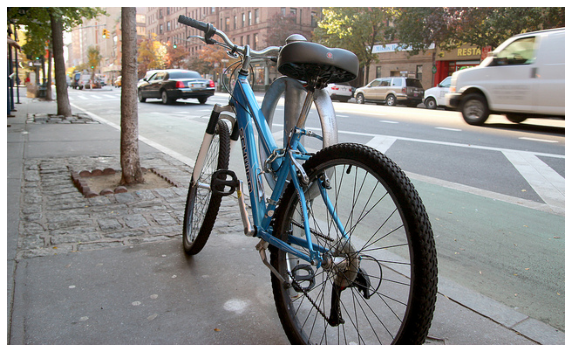

In [12]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']>1]
print('ground truth captions')
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print('\n')
print('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

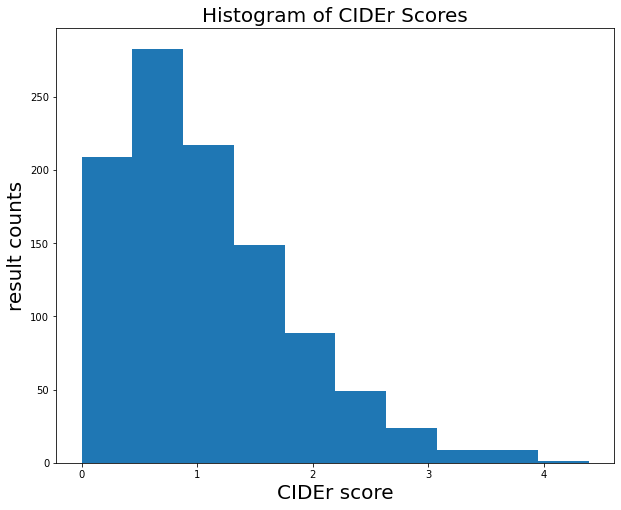

In [11]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [11]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))

In [9]:
coco.dataset['images'][0]

{'license': 3,
 'url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'file_name': 'COCO_val2014_000000391895.jpg',
 'id': 391895,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'height': 360}